In [243]:
import firebase_admin
from firebase_admin import db
from firebase_admin import credentials

In [404]:
import pandas as pd
import requests
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [245]:
cred = credentials.Certificate("cred.json")
#firebase_admin.initialize_app(cred)

In [246]:
firebase_admin.initialize_app(cred, {
    'databaseURL': "https://dsci551-c4bee-default-rtdb.firebaseio.com/"
})

ValueError: The default Firebase app already exists. This means you called initialize_app() more than once without providing an app name as the second argument. In most cases you only need to call initialize_app() once. But if you do want to initialize multiple apps, pass a second argument to initialize_app() to give each app a unique name.

In [30]:
import json

In [247]:
def ls(dir_in):
    dir_list = []
    try:
        ref1 = db.reference(dir_in)
        result = ref1.get()
        if result == None:
            return'No directory exists'
        else:
            for i in result:
                dir_list.append(i)
    except:
        return'Invalid error'
    return dir_list

In [248]:
# check the directory before the last one
def dirExist(dir_in):
    try:
        if_exist = True
        if dir_in[0] != '/':
            return False
        dir_in_list = dir_in.split('/')
        dir_in_list = dir_in_list[1:]
        for i in range(len(dir_in_list)):
            if i != (len(dir_in_list) - 1):
                current_dir = '/' + '/'.join(dir_in_list[0:i])
                current_ls = ls(current_dir)
                if dir_in_list[i] not in current_ls:
                    if_exist = False
                    break
        return if_exist
    except:
        return False

In [228]:
def newDirExist(dir_in):
    try:
        if_exist = True
        if dir_in[0] != '/':
                return False
        dir_in_list = dir_in.split('/')
        dir_in_list = dir_in_list[1:]  
        last_ls = ls('/' + '/'.join(dir_in_list[0:-1]))
        if dir_in_list[-1] not in last_ls:
            if_exist = False
        return if_exist
    except:
        return False

In [229]:
def mkDirectory(dir_in):
    try:
        dir_in_list = dir_in.split('/')
        dir_in_list = dir_in_list[1:]
        if dirExist(dir_in) == False:
            return 'Directory not exist'
        if newDirExist(dir_in) == True:
            return 'You new diretory already exists'
        if len(dir_in_list) >= 2:
            child_ref = dir_in_list[-2]
            new_ref = dir_in_list[-1]
            dir_ref = dir_in[0: -(len(child_ref) + len(new_ref) + 2)]
            mkdir = db.reference(dir_ref)
            child = mkdir.child(child_ref)
            child.update({new_ref: ""})
        else:
            new_ref = dir_in_list[-1]
            dir_ref = '/'
            mkdir = db.reference(dir_ref)
            mkdir.update({new_ref: ""})
    except:
        return'Invalid error'
    return 'You successfully made a new directory'

In [230]:
def uploadFile(fileName):
    # if filename not found?
    try: 
        if fileName not in ['collision.csv', 'parties.csv', 'victims.csv', 'LA_Weather.csv', 'LA_County_COVID_Cases.csv']:
            return 'File not found'
        if dirExist('/Data/x') == False:
            d = mkDirectory('/Data')
        if fileName == 'collision.csv':
            df = pd.read_csv('../Data/' + fileName, encoding='latin1',low_memory = False)
            df['collision_date'] = df['collision_date'].astype('string')
            df1 = df[df['collision_date'].str.contains('2020') == True]
            json1 = df1.to_json(orient = 'index')
            df2 = df[df['collision_date'].str.contains('2021') == True]
            json2 = df2.to_json(orient = 'index')
            df1_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/collision_json/" + "collision_2020.json"
            df2_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/collision_json/" + "collision_2021.json"
            requests.put(df1_url, json1)
            requests.put(df2_url, json2)
            return [df1_url, df2_url]
        elif fileName == 'parties.csv':
            df = pd.read_csv('../Data/' + fileName, encoding='latin1')
            df1 = df[df['at_fault'] == 0]
            json1 = df1.to_json(orient = 'index')
            df2 = df[df['at_fault'] == 1]
            json2 = df2.to_json(orient = 'index')
            df1_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/parties_json/" + "parties_0.json"
            df2_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/parties_json/" + "parties_1.json"
            requests.put(df1_url, json1)
            requests.put(df2_url, json2)
            return [df1_url, df2_url]
        elif fileName == 'victims.csv':
            df = pd.read_csv('../Data/' + fileName, encoding='latin1')
            json = df.to_json(orient = 'index')
            df_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/victims_json/" + "victims.json"
            requests.put(df_url, json)
            return [df_url]
        elif fileName == 'LA_Weather.csv':
            df = pd.read_csv('../Data/' + fileName, encoding='latin1')
            df['datetime'] = df['datetime'].astype('str')
            df1 = df[df['datetime'].str.contains('2020') == True]
            json1 = df1.to_json(orient = 'index')
            df2 = df[df['datetime'].str.contains('2021') == True]
            json2 = df2.to_json(orient = 'index')
            df1_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/LA_Weather_json/" + "LA_Weather_2020.json"
            df2_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/LA_Weather_json/" + "LA_Weather_2021.json"
            requests.put(df1_url, json1)
            requests.put(df2_url, json2)
            return [df1_url, df2_url]
        elif fileName == 'LA_County_COVID_Cases.csv':
            df = pd.read_csv('../Data/' + fileName, encoding='latin1')
            df['date'] = df['date'].astype('str')
            df1 = df[df['date'].str.contains('2020') == True]
            json1 = df1.to_json(orient = 'index')
            df2 = df[df['date'].str.contains('2021') == True]
            json2 = df2.to_json(orient = 'index')
            df1_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/LA_County_COVID_Cases_json/" + "LA_Covid_2020.json"
            df2_url = "https://dsci551-c4bee-default-rtdb.firebaseio.com/Data/LA_County_COVID_Cases_json/" + "LA_Covid_2021.json"
            requests.put(df1_url, json1)
            requests.put(df2_url, json2)
            return [df1_url, df2_url]
    except:
        return 'Invalid Input'

In [231]:
def put(new_file, dir_in):
    try:
        dir_in_list = dir_in.split('/')
        dir_in_list = dir_in_list[1:]
        new_file_json = new_file.replace('.csv', '_json')
        if dirExist(dir_in + '/' + new_file) == False:
            return 'Directory not exist'
        if newDirExist(dir_in + '/' + new_file_json) == True:
            return 'You file already exists'
        child_ref = dir_in_list[-1]
        dir_ref = dir_in[0: -(len(child_ref) + 1)]
        if dir_ref == '':
            dir_ref = '/'
        result_url = uploadFile(new_file)
        if result_url == 'Invalid Input' or result_url == 'File not found':
            return 'Invalid Input'
        mkdir = db.reference(dir_ref)
        child = mkdir.child(child_ref)
        child.update({new_file_json: ""})
        child = child.child(new_file_json)
        if len(result_url) == 2:
            child.update({"p1": result_url[0]})
            child.update({"p2": result_url[1]})
        else:
            child.update({"p": result_url[0]})
        return "You successfully created a file"
    except:
        return "Invalid Input"

In [232]:
def rm(dir_in):
    try:
        if dirExist(dir_in + '/x') == False:
                return 'Directory not exist'
        ref = db.reference(dir_in)
        ref.delete()
        return "Successfully deleted"
    except:
        return "Invalid Input"

In [233]:
def cat(dir_in):
    try:
        if dirExist(dir_in) == True and newDirExist(dir_in) == True:      
            ref = db.reference(dir_in)
            par = ref.get()
            dir_in = dir_in.split('/')
            if dir_in[-1] == 'LA_Weather_json':
                url1 = par['p1']
                response1 = requests.get(url1)
                r1 = response1.json()
                while None in r1:
                    r1.remove(None)
                d1 = json.dumps(r1)
                df1 = pd.read_json(d1)

                url2 = par['p2']
                response2 = requests.get(url2)
                r2 = response2.json()
                d2 = json.dumps(r2)
                df2 = pd.read_json(d2, orient = 'index')

                frames = [df1, df2]
                df = pd.concat(frames)
            if dir_in[-1] == 'victims_json':
                url1 = par['p']
                response1 = requests.get(url1)
                r1 = response1.json()
                while None in r1:
                    r1.remove(None)
                d1 = json.dumps(r1)
                df = pd.read_json(d1)
            if dir_in[-1] == 'parties_json':
                url1 = par['p1'] 
                response1 = requests.get(url1)
                r1 = response1.json()
                df1 = pd.DataFrame()
                for a in r1:
                    df1 = df1.append(a, ignore_index = True)

                url2 = par['p2'] 
                response2 = requests.get(url2)
                r2 = response2.json()
                d2 = json.dumps(r2)
                df2 = pd.read_json(d2, orient = 'index')

                frames = [df1, df2]
                df = pd.concat(frames)
            if dir_in[-1] == 'collision_json':      
                url1 = par['p1'] 
                response1 = requests.get(url1)
                r1 = response1.json()
                df1 = pd.DataFrame()
                for a in r1:
                    df1 = df1.append(a, ignore_index = True)
                    
                url2 = par['p2']
                response2 = requests.get(url2)
                r2 = response2.json()
                d2 = json.dumps(r2)
                df2 = pd.read_json(d2, orient = 'index')

                frames = [df1, df2]
                df = pd.concat(frames)
            if dir_in[-1] == 'LA_County_COVID_Cases_json':
                url1 = par['p1']
                response1 = requests.get(url1)
                r1 = response1.json()
                d1 = json.dumps(r1)
                df1 = pd.read_json(d1, orient = 'index')

                url2 = par['p2']
                response2 = requests.get(url2)
                r2 = response2.json()
                d2 = json.dumps(r2)
                df2 = pd.read_json(d2, orient = 'index')
                

                frames = [df1, df2]
                df = pd.concat(frames)
            return df
        else:
            return "File not exist"
    except:
        return "Invalid Input"

In [250]:
def getPartitionLocations(dir_in):
    if dirExist(dir_in) == True and newDirExist(dir_in) == True:
        dir_in_list = dir_in.split('/')
        if dir_in_list[-1] != 'victims_json':
            if dir_in_list[-1] == 'LA_Weather_json':
                v1 = 'LA_Weather_2020'
                v2 = 'LA_Weather_2021'
            elif dir_in_list[-1] == 'LA_County_COVID_Cases_json':
                v1 = 'LA_Covid_2020'
                v2 = 'LA_Covid_2021'
            elif dir_in_list[-1] == 'collision_json':
                v1 = 'collision_2020'
                v2 = 'collision_2021'
            elif dir_in_list[-1] == 'parties_json':
                v1 = 'parties_0'
                v2 = 'parties_1'
            return ['/Data/' + dir_in_list[-1] + '/' + v1, '/Data/' + dir_in_list[-1] + '/' + v2]
        else:
            return '/Data/' + dir_in_list[-1] + '/p'
    else:
        return 'Directory not exist'

In [251]:
getPartitionLocations('/root/user/dataset/LA_County_COVID_Cases_json')

['/Data/LA_County_COVID_Cases_json/LA_Covid_2020',
 '/Data/LA_County_COVID_Cases_json/LA_Covid_2021']

In [239]:
def readPartition(dir_in, num):
    try:
        if dirExist(dir_in) == True and newDirExist(dir_in) == True:
            ref = db.reference(dir_in)
            par = ref.get()
            dir_in = dir_in.split('/')
            if dir_in[-1] == 'LA_Weather_json' and num == 1:
                url1 = par['p1']
                response1 = requests.get(url1)
                r1 = response1.json()
                while None in r1:
                    r1.remove(None)
                d1 = json.dumps(r1)
                df = pd.read_json(d1)
                return df
            elif dir_in[-1] == 'LA_Weather_json' and num == 2:
                url2 = par['p2']
                response2 = requests.get(url2)
                r2 = response2.json()
                d2 = json.dumps(r2)
                df = pd.read_json(d2, orient = 'index')
                return df
            elif dir_in[-1] == 'victims_json' and num == 1:
                url1 = par['p']
                response1 = requests.get(url1)
                r1 = response1.json()
                while None in r1:
                    r1.remove(None)
                d1 = json.dumps(r1)
                df = pd.read_json(d1)
                return df
            elif dir_in[-1] == 'parties_json' and num == 1:
                url1 = par['p1'] 
                response1 = requests.get(url1)
                r1 = response1.json()
                df = pd.DataFrame()
                for a in r1:
                    new_df = pd.DataFrame([a])
                    df = pd.concat([df, new_df], axis=0, ignore_index=True)
                return df
            elif dir_in[-1] == 'parties_json' and num == 2:
                url2 = par['p2'] 
                response2 = requests.get(url2)
                r2 = response2.json()
                d2 = json.dumps(r2)
                df = pd.read_json(d2, orient = 'index')
                return df
            elif dir_in[-1] == 'collision_json' and num == 1:
                url1 = par['p1'] 
                response1 = requests.get(url1)
                r1 = response1.json()
                df = pd.DataFrame()
                for a in r1:
                    new_df = pd.DataFrame([a])
                    df = pd.concat([df, new_df], axis=0, ignore_index=True)
                return df
            elif dir_in[-1] == 'collision_json' and num == 2:
                url2 = par['p2']
                response2 = requests.get(url2)
                r2 = response2.json()
                d2 = json.dumps(r2)
                df = pd.read_json(d2, orient = 'index')
                return df
            elif dir_in[-1] == 'LA_County_COVID_Cases_json' and num == 1:
                url1 = par['p1']
                response1 = requests.get(url1)
                r1 = response1.json()
                d1 = json.dumps(r1)
                df = pd.read_json(d1, orient = 'index')
                return df
            elif dir_in[-1] == 'LA_County_COVID_Cases_json' and num == 2:
                url2 = par['p2']
                response2 = requests.get(url2)
                r2 = response2.json()
                d2 = json.dumps(r2)
                df = pd.read_json(d2, orient = 'index')
                return df
            else:
                return 'Invalid Input'
        else:
            return 'Directory not exist'
    except:
        return 'Invalid Input'

# Add

In [203]:
a = ls('/root/user/dataset')
a

['LA_County_COVID_Cases_json',
 'LA_Weather_json',
 'collision_json',
 'parties_json',
 'victims_json']

# Search

In [435]:
def searchCountByGenderAge(gender,lage,uage):
    dir_file = '/root/user/dataset/parties_json'
    print('You are searching for gender',gender, 'and age from ', lage, 'to', uage)
    
    #map partitions
    plist = []
    for i in range(len(getPartitionLocations(dir_file))):
        p = i+1
        cond = "party_age>="+str(lage)+"&party_age<="+str(uage)+"&party_sex=='"+str(gender)+"'"
        p_input = readPartition(dir_file, p).query(cond).groupby('party_sobriety')['id'].count().to_dict()
        plist.append(p_input)
        print('Partition', p, "'s input is:'")
        print(p_input)
        print()
#reduce
    output = reduceDict(plist)
    print('The final reduced output of targeted individuals of each sobriety condition is:')
    return output

In [436]:
searchCountByGenderAge('male',20,30)

You are searching for gender male and age from  20 to 30


{'had been drinking, impairment unknown': 31,
 'had been drinking, not under influence': 56,
 'had been drinking, under influence': 391,
 'had not been drinking': 5090,
 'impairment unknown': 243,
 'not applicable': 140}

In [1]:
def searchCOVIDCasesDate(year,month,date):
    dir_file =  '/root/user/dataset/LA_County_COVID_Cases_json'
    date = str(month)+'/'+str(date)+'/'+str(year)
    print('You are searching for number of cases on ' + date)
    for i in range(len(getPartitionLocations(dir_file))):
        p = i+1
        p_df = readPartition(dir_file, p)
        p_input = p_df[p_df['date']==date]['cases']

        if p_input.empty:
            pass
        else:
            print('In partition', p, 'we found result', p_input.to_string(index=False))
    output = p_input
    return output

In [428]:
searchCOVIDCasesDate(2020,10,21)

You are searching for number of cases on 10/21/2020
In partition 1 we have result 299760


Series([], Name: cases, dtype: int64)

In [2]:
def searchMaxCOVID():
    dir_file = '/root/user/dataset/LA_County_COVID_Cases_json'
    plist_max = []
    for i in range(len(getPartitionLocations(dir_file))):
        p = i+1
        p_max = readPartition(dir_file, p)[['date','new_cases']].sort_values(by = 'new_cases', ascending=False)[0:1]
        plist_max.append(p_max)
        print("Partition", p, "'s max new COVID cases output is:'")
        print(p_max)
        print()
    df = pd.concat(plist_max).sort_values(by = 'new_cases', ascending=False)
    output = df[0:1]
    ans = 'The maximum number of new cases is on '+ output['date'].to_string(index = False) + ' with cases ' + output['new_cases'].to_string(index = False)
    return ans

In [341]:
searchMaxCOVID()

'The maximum number of new cases is on 2021-12-29 with cases 44710'

In [99]:
# def searchCountRange(lyear,lmonth,ldate,uyear,umonth,udate):
#     ldate = str(lyear)+'-'+str(lmonth)+'-'+str(ldate)
#     udate = str(uyear)+'-'+str(umonth)+'-'+str(udate)
#     dir_file = '/root/user/dataset/collisions_json'
#     plist = []
#     cond = "collision_date>='"+ldate+"'&collision_date<='"+udate+"'"
#     try:
#         for i in range(len(getPartitionLocations(dir_file))):
#             p = i+1
#             p_input = readPartition(dir_file,p).query(cond)['case_id'].count()
#             plist.append(p_input)
#             print('partition', p, ':', p_input)
#         #reduce
#         output = 'The total number of cases in selected dates is '+str(sum(plist))
#     except:
#         return 'Invalid Input'
#     return output

In [396]:
def reduceDict(lst):
    p1 = lst[0]
    for key in p1:
        for p in lst[1:]:
            if key in p:
                p1[key]+=p[key]
            else:
                p1[key] = p[key]
    return p1

# Analytics

In [3]:
def sobrietyAtFault():
    dir_file = '/root/user/dataset/parties_json'
    plist = []
    for i in range(len(getPartitionLocations(dir_file))):
        p = i+1
        pdf = pd.DataFrame(readPartition(dir_file,p).groupby(['at_fault', 'party_sobriety'])['id'].count()).reset_index()
        pdf.columns = ['at_fault', 'sobriety', 'count']
        plist.append(pdf)
        print("Partition", p, "'s party at_fault and sobriety situation is:'")
        print(pdf)
        print()
    output = pd.concat(plist)
    print("The reduced table:")
    return output

In [393]:
sobrietyAtFault()

,at_fault,sobriety,count
0,0.0,"had been drinking, impairment unknown",68
1,0.0,"had been drinking, not under influence",121
2,0.0,"had been drinking, under influence",66
3,0.0,had not been drinking,17048
4,0.0,impairment unknown,913
5,0.0,not applicable,4256
0,1.0,"had been drinking, impairment unknown",243
1,1.0,"had been drinking, not under influence",111
2,1.0,"had been drinking, under influence",1156
3,1.0,had not been drinking,11060


In [4]:
def lightingPercentage():
    dir_file = '/root/user/dataset/collision_json'
    plist = []
    for i in range(len(getPartitionLocations(dir_file))):
        p = i+1
        pdf = readPartition(dir_file, p).groupby('lighting')['case_id'].count().to_dict()
        plist.append(pdf)
        print("Partition", p, "'s collision group by lighting count is:'")
        print(pdf)
        print()
    p_input = reduceDict(plist)
    df = pd.DataFrame(p_input.items(), columns = ['lighting','count'])
    fig = plt.figure(figsize = (4, 4))
    ax = fig.add_subplot(111)
    ax.pie(df['count'], labels = df['lighting'], textprops = dict(color='w'))
    ax.legend(df['lighting'], title="Type of Lighting", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title('Percentage of Lighting Condition of All Collisions in LA 2020&2021')
    plt.show()
    
    
        

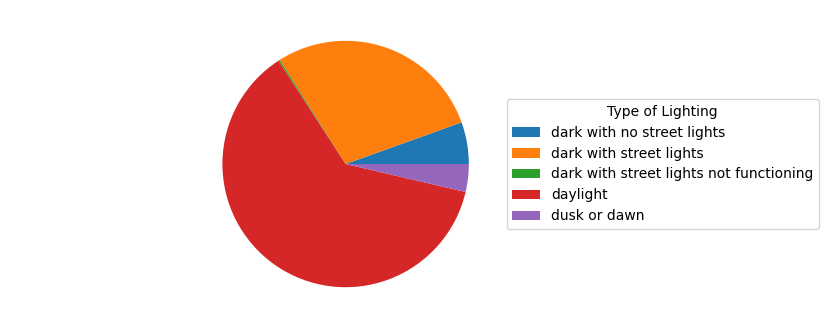

In [398]:
lightingPercentage()

In [5]:
def avgAgeAtFault():
    dir_file = '/root/user/dataset/parties_json'
    plist = []
    for i in range(len(getPartitionLocations(dir_file))):
        p = i+1
        pdf = readPartition(dir_file,p)
        pdf = pdf[pdf['at_fault'] == 1][['party_age', 'party_sex']].dropna()
        pdf['party_sex'] = pdf['party_sex'].str.replace('X', 'other')
        plist.append(pdf)
        print('Partition', p, 'has parties at fault with following gender and age:')
        print(pdf)
        print()
    total = pd.concat(plist)
    sns.boxplot(x = total['party_sex'],
               y = total['party_age']).set(xlabel='Gender',
                                          ylabel='Age',
                                          title='Age and Gender of Parties at fault')
    plt.show()

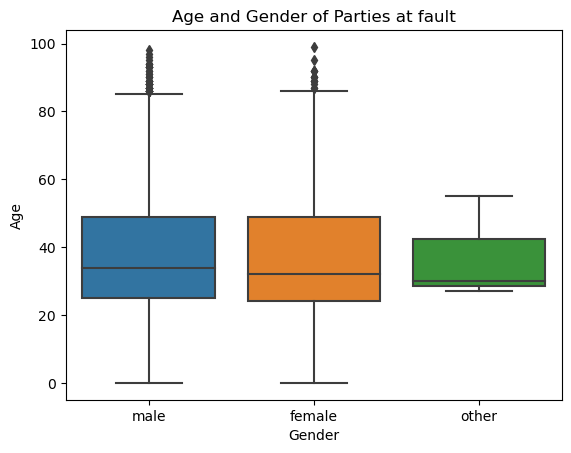

In [410]:
avgAgeAtFault()